In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [3]:
# metadata
sub_df = pd.read_csv('data/submission_format.csv')
trn_df = pd.read_csv('data/train_labels.csv')
met_df = pd.read_csv('data/metadata.csv')

In [4]:
# train data
train = trn_df[0:300]    # sample
train.head()      # printing first five rows of the file

,id,verified,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a3f2a10,True,1.0,0.0,0.0,0.0,0.0
1,7a1f731e,True,0.0,0.0,0.0,1.0,0.0
2,7a424ad8,True,0.0,1.0,0.0,0.0,0.0
3,7a3edc5e,True,0.0,1.0,0.0,0.0,0.0
4,7a303a6e,True,0.0,1.0,0.0,0.0,0.0


In [5]:
# get images & pre-process as needed (see other notebook)

train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train_images/'+train['id'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 300/300 [00:01<00:00, 254.00it/s]


In [6]:
X.shape

(300, 400, 400, 3)

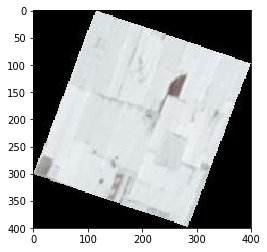

In [7]:
plt.imshow(X[2])

In [8]:
train['healthy_metal'][2]

1.0

In [9]:
y = np.array(train.drop(['id', 'verified'],axis=1))
y.shape

(300, 5)

In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.1)

In [20]:
# model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 93, 93, 64)       

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# train
train_log = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Train on 270 samples, validate on 30 samples
Epoch 1/10
270/270 [==============================] - 19s 72ms/step - loss: 0.6072 - accuracy: 0.6726 - val_loss: 0.6163 - val_accuracy: 0.8000
Epoch 2/10
270/270 [==============================] - 19s 70ms/step - loss: 0.4870 - accuracy: 0.7719 - val_loss: 0.6122 - val_accuracy: 0.8000
Epoch 3/10
270/270 [==============================] - 19s 69ms/step - loss: 0.4613 - accuracy: 0.7652 - val_loss: 0.5880 - val_accuracy: 0.8000
Epoch 4/10
270/270 [==============================] - 19s 69ms/step - loss: 0.4685 - accuracy: 0.7652 - val_loss: 0.5280 - val_accuracy: 0.7800
Epoch 5/10
270/270 [==============================] - 19s 69ms/step - loss: 0.4596 - accuracy: 0.7741 - val_loss: 0.5681 - val_accuracy: 0.8067
Epoch 6/10
270/270 [==============================] - 19s 69ms/step - loss: 0.4443 - accuracy: 0.7674 - val_loss: 0.5439 - val_accuracy: 0.7933
Epoch 7/10
270/270 [==============================] - 19s 69ms/step - loss: 0.4299 - accura

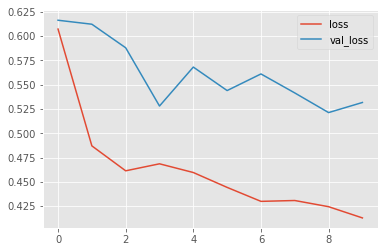

In [24]:
# preprocess val images

import matplotlib.pyplot as plt

plt.style.use("ggplot")

plt.plot(train_log.history["loss"], label="loss")
plt.plot(train_log.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import log_loss

# Predict
predictions = model.predict(X_test)

# Evaluate
loss = log_loss(y_test, predictions, normalize=True)

# Result
print('NNW Performance on the test set: Loss = %0.4f' % loss)

NNW Performance on the test set: Loss = 1.4352


In [27]:
predictions

array([[0.3140381 , 0.4736388 , 0.37269294, 0.4903131 , 0.2801854 ],
       [0.33564514, 0.46850964, 0.3889794 , 0.48770952, 0.30696458],
       [0.31656346, 0.45699972, 0.3638457 , 0.49705237, 0.27453172],
       [0.32254252, 0.46734792, 0.37335956, 0.49431267, 0.28562337],
       [0.32119066, 0.4603694 , 0.3675514 , 0.49771106, 0.28086668],
       [0.31477758, 0.46685675, 0.3781525 , 0.47963983, 0.28703642],
       [0.31838793, 0.46761718, 0.37959075, 0.4825068 , 0.28965616],
       [0.3553687 , 0.46676755, 0.40167984, 0.48780882, 0.3283614 ],
       [0.34535939, 0.4616363 , 0.3865295 , 0.4965085 , 0.30893755],
       [0.28474206, 0.474866  , 0.3623972 , 0.46513337, 0.25526732],
       [0.37114793, 0.47127867, 0.4152485 , 0.48445722, 0.34994933],
       [0.3514809 , 0.47069076, 0.40298963, 0.47969005, 0.32827407],
       [0.31213975, 0.4727782 , 0.37060696, 0.49120212, 0.27760106],
       [0.3296403 , 0.47192198, 0.38224483, 0.4919602 , 0.29680803],
       [0.30760312, 0.4721382 , 0.